In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [17]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

In [14]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

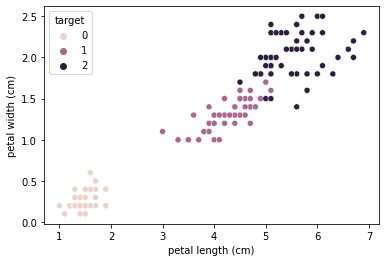

In [16]:
sns.scatterplot(x="petal length (cm)", y = "petal width (cm)", hue = "target", data=data)

In [19]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

In [23]:
train.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [24]:
cols = ['petal length (cm)', 'petal width (cm)']

In [27]:
from sklearn import neighbors

K = 5
clf = neighbors.KNeighborsClassifier(K)
clf.fit (train[cols], train['target'])

KNeighborsClassifier()

In [28]:
clf.predict(test[cols])

array([1, 0, 0, 1, 1, 0, 2, 0, 0, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 0, 1, 2,
       2, 2, 1, 2, 2, 2, 0, 0])

In [30]:
test['target']

50     1
22     0
2      0
75     1
74     1
39     0
137    2
6      0
40     0
127    2
59     1
113    2
7      0
42     0
142    2
89     1
120    2
149    2
107    2
30     0
63     1
126    2
145    2
77     1
58     1
134    2
117    2
103    2
3      0
48     0
Name: target, dtype: int32

# Crossvalidation and Finding K

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
K = 5
clf = neighbors.KNeighborsClassifier(K)
scores = cross_val_score(clf, data[cols], data['target'], cv=5, scoring='f1_macro')

In [35]:
scores.mean()

0.9664818612187034

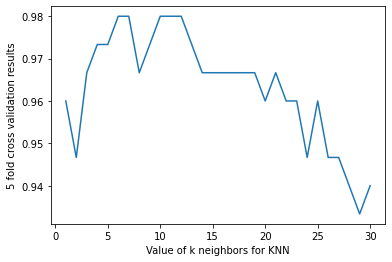

In [43]:
from sklearn.model_selection import cross_validate

score_history = []
for k in range(1,31):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    cval = cross_validate(knn, data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], data['target'], cv=5)
    score_history.append (cval['test_score'].mean())
    
plt.plot (list(range(1,31)), score_history)
plt.xlabel('Value of k neighbors for KNN')
plt.ylabel('5 fold cross validation results')
plt.show()

# Visualizing Decision Boundary

In [81]:
K = 3
clf = neighbors.KNeighborsClassifier(n_neighbors=k)
X_train = train[['sepal length (cm)', 'sepal width (cm)']]
clf.fit(X_train, train['target'])

X = train.values

In [62]:
X_train.shape

(120, 2)

In [75]:
x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1

In [76]:
y_min, y_max = X[:, 1].min()-1, X[:,1].max()+1

In [86]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

In [87]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [88]:
Z = Z.reshape(xx.shape)

In [90]:
plt.rcParams['figure.figsize']=(10,10)

<ipython-input-91-915a0a327a1f>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,Z,alpha=0.5)


(1.0, 5.380000000000004)

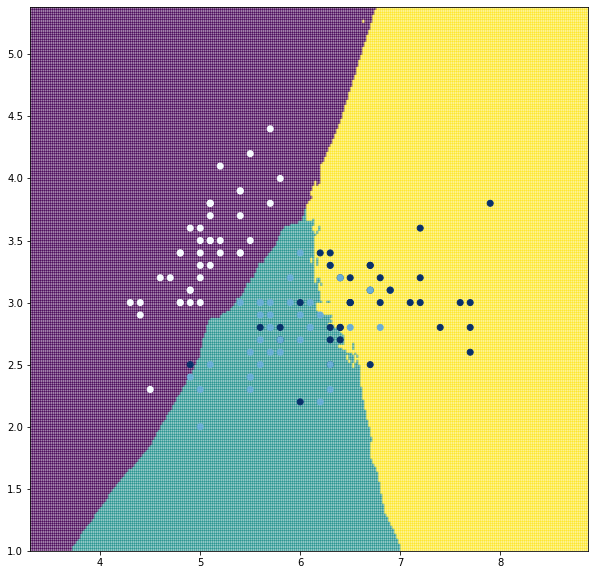

In [91]:
plt.figure()
plt.pcolormesh(xx,yy,Z,alpha=0.5)

plt.scatter(X[:,0], X[:,1], c=train['target'], cmap='Blues')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())